In [1]:
from reader import *
from scipy import misc
from matplotlib import pyplot as plt
%matplotlib inline

from utils import *

/home/user/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
df = Data('voc_2007_train.txt', shuffle=False, flip=False, affine_trans=False)

In [3]:
df.reset_state()

In [4]:
g = df.get_data()

In [5]:
pb = next(g)
pb = next(g)

In [6]:
img = misc.imread("voc/VOCdevkit/VOC2007/JPEGImages/000017.jpg")
# img = pb[0]
height, width, _ = img.shape

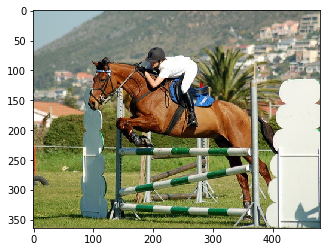

In [7]:
plt.imshow(img)

In [8]:
len(pb)

4

In [9]:
pb[1].shape

(8732,)

In [28]:
anchor_idx_ary = np.nonzero(pb[1]==15)[0]

In [29]:
anchor_idx_ary

array([6397, 6403, 6405, 6508, 6511, 6514, 6517, 6519, 6520, 6625, 6631,
       6633, 6745, 6747])

In [30]:
anchor_loc_ary = pb[2][anchor_idx_ary]
anchor_ary = cfg.all_anchors[anchor_idx_ary]

In [31]:
# draw the gt box
anchor_img = np.copy(img)
xmin = 185
ymin = 62
xmax = 279
ymax = 199
anchor_img = cv2.rectangle(anchor_img,
                           (int(xmin), int(ymin)),                     
                           (int(xmax), int(ymax)),
                           (0, 255, 0),                
                           3)

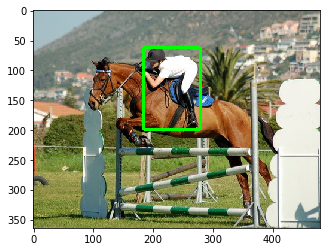

In [32]:
plt.imshow(anchor_img)

In [33]:
anchor_ary.shape

(14, 6)

In [34]:
for anchor in anchor_ary:
    x, y, w, h = anchor[:4]
    xmin = (x - w / 2) * width
    xmax = (x + w / 2) * width
    ymin = (y - h / 2) * height
    ymax = (y + h / 2) * height
#     import pdb
#     pdb.set_trace()
    anchor_img = cv2.rectangle(anchor_img,
                               (int(xmin), int(ymin)),                     
                               (int(xmax), int(ymax)),
                               (0, 0, 255),                
                               3)

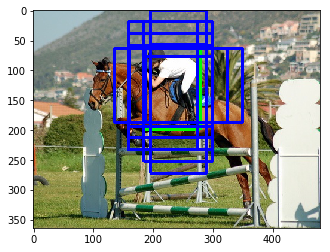

In [35]:
plt.imshow(anchor_img)

In [36]:
box_img = np.copy(img)

In [37]:
for idx, encode_box in enumerate(anchor_loc_ary):
    anchor_box = anchor_ary[idx]
    anchor_box = Box(*anchor_box[:4])
    decoded_box = decode_box(encode_box, anchor_box)
    xmin = (decoded_box.x - decoded_box.w / 2) * width
    xmax = (decoded_box.x + decoded_box.w / 2) * width
    ymin = (decoded_box.y - decoded_box.h / 2) * height
    ymax = (decoded_box.y + decoded_box.h / 2) * height
    box_img = cv2.rectangle(box_img,
                            (int(xmin), int(ymin)),                     
                            (int(xmax), int(ymax)),
                            (255, 0, 0),                
                            3)

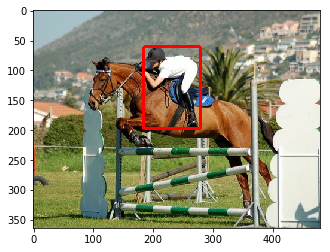

In [38]:
plt.imshow(box_img)